In [9]:
import numpy as np
#%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import cm
from numpy import linalg as LA
import math
#import numba
import plotly.graph_objs as go
from plotly.offline import iplot

def create_vector(a,b,step):
    new_vec = []
    curr_val = a
    while curr_val < b:
        new_vec.append(curr_val)
        curr_val += step
        
    return new_vec

from DensiTDA import landmarktools

In [10]:
a_1 = [2,1]
a_2 = [4,3]
a_3 = [7,10]
a_4 = [9,13]
cov = np.array([[2,1],[1,2]])

In [11]:
X_1 = np.random.multivariate_normal(a_1, 1 * cov, 1000)
X_2 = np.random.multivariate_normal(a_2, 0.7 * cov, 500)
X_3 = np.random.multivariate_normal(a_3, cov, 200)
X_4 = np.random.multivariate_normal(a_4, cov, 100)

X = np.concatenate((X_1, X_2, X_3, X_4), axis=0)

In [12]:
len(X)

1800

In [13]:
# hyperparameters
d = X.shape[1]
h = np.std(X) * (len(X)) ** (-1 / (d + 4))
A = np.ones(len(X))
s = 0.6

In [14]:
chosen_landmarks = landmarktools.max_of_gaussians_landmarking(X, A, X, h, s, metric = 'euclidean')

Initializing Distrbution over Candidate Landmark Points:


100%|██████████████████████████████████████| 1800/1800 [00:07<00:00, 240.94it/s]


Maximizing Gaussians over Landmark Points:


100%|█████████████████████████████████████| 1800/1800 [00:00<00:00, 3142.65it/s]


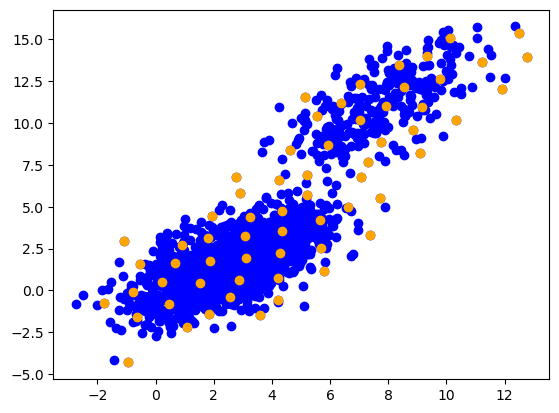

In [15]:
chosen_landmarks = np.array(chosen_landmarks)

plt.scatter(X[:,0], X[:,1], color="blue")
plt.scatter(chosen_landmarks[:,0], chosen_landmarks[:,1], color="orange")
plt.show()